In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/sumit/Documents/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [6]:
df=df.iloc[:,1:]

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
import matplotlib.pyplot as plt

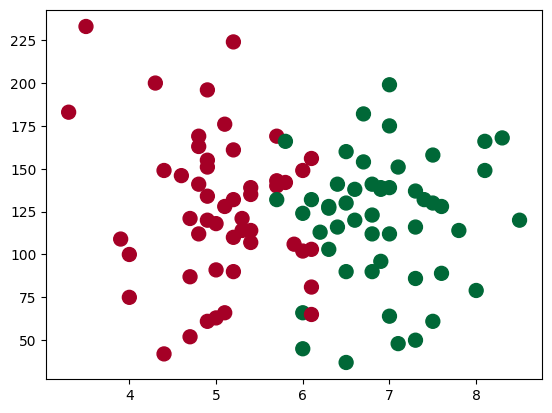

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='RdYlGn', s=100) 


## In the above graph we can observe it can be sperated by the line so we will use logistic regression

we have only two columns and both are useful so we are not doing anything in feature selection

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

### so above x is 2d tensor and y is 1d tensor

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

In [14]:
Y_train

23    0
57    1
34    0
60    1
70    1
     ..
27    1
93    1
36    0
6     0
18    0
Name: placement, Length: 90, dtype: int64

In [15]:
X_train

,cgpa,iq
23,4.7,87.0
57,6.5,130.0
34,4.8,163.0
60,6.9,139.0
70,6.3,127.0
...,...,...
27,6.0,124.0
93,6.8,112.0
36,5.7,140.0
6,5.7,143.0


In [16]:
# scaling the value to give equal priority
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_train

array([[-1.1904352 , -0.92821911],
       [ 0.41264462,  0.20425502],
       [-1.10137521,  1.07336308],
       [ 0.76888458,  0.44128449],
       [ 0.23452464,  0.1252452 ],
       [-0.21077531,  0.52029432],
       [ 0.05640466, -1.08623876],
       [ 0.14546465, -0.24346731],
       [ 1.74854447, -1.13891197],
       [-1.01231522, -1.61297091],
       [-0.65607526, -0.03277445],
       [ 1.12512454, -0.16445748],
       [-0.56701527,  0.33593806],
       [ 1.83760446,  0.70465057],
       [-0.21077531,  1.1523729 ],
       [ 1.30324452,  0.94168004],
       [-0.03265533, -2.03435664],
       [ 0.85794457,  0.44128449],
       [ 0.50170461, -0.05911105],
       [-0.74513525,  1.02068987],
       [-1.10137521,  0.49395771],
       [ 0.50170461,  0.41494789],
       [ 0.05640466,  0.88900683],
       [ 0.41264462, -0.84920929],
       [-1.81385513, -1.2442584 ],
       [-0.56701527,  0.44128449],
       [ 0.05640466,  0.25692824],
       [-0.83419524,  0.15158181],
       [ 0.67982459,

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf=LogisticRegression()

In [21]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [22]:
y_pred=clf.predict(X_test)

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(Y_test,y_pred)

0.6

In [25]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

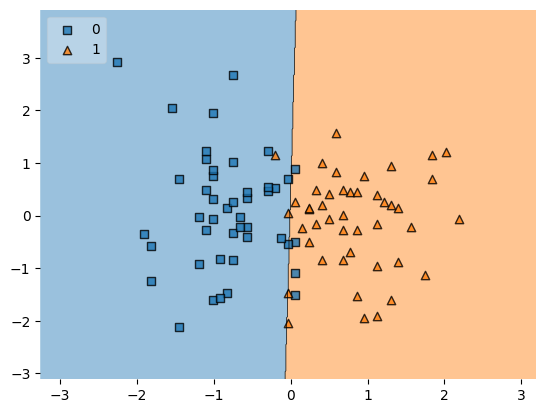

In [26]:
plot_decision_regions(X=X_train, y=Y_train.values,clf=clf, legend=2)

In [27]:
import pickle

In [28]:
pickle.dump(clf,open('model.pkl','wb'))